# Dota数据集实验
实验内容：比较七种模型(CART、AdaBoost、GBDT、Random Forest、Extra Tree、XGBoost、LightGBM)在dota数据集上的表现及耗时。

实验环境：Win10、Python3.6

主要库版本：
- numpy 1.18.2
- pandas 1.1.3
- scikit-learn 0.23.2
- xgboost 1.2.1
- lightgbm 3.0.0.99


In [1]:
# import
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from matplotlib import pyplot

import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 读取数据集
dataset_train = pd.read_csv("./dota/dota2Train.csv")
dataset_validation = pd.read_csv("./dota/dota2Test.csv")

In [3]:
# 常规的数据审查操作
#dataset_train.shape
#dataset_validation.shape
#dataset_train.info()
#dataset_validation.info()
#dataset_train.head()

In [4]:
# 训练集、测试集 划分
X_train = dataset_train.values[:, 1:]
Y_train = dataset_train.values[:,0]
X_validation = dataset_validation.values[:, 1:]
Y_validation = dataset_validation.values[:,0]

In [5]:
# validation_size = 0.2 # 20%用于test
seed = 12 # 随机数的种子，后边每次对算法进行评估前都会重新设置随机数的种子，
         # 确保每次对算法评估都使用相同数据集

In [6]:
# 算法审查
models = {}
models['CART'] = DecisionTreeClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['GBDT'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier() 
models['ETC'] = ExtraTreesClassifier()
models['XGBoost'] = XGBClassifier()
models['LightGBM'] = LGBMClassifier()

In [7]:
models

{'CART': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'AdaBoost': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 'GBDT': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                          

In [8]:
results_fold = []
timeResults = []
# k折交叉验证
for key in models:
    kfold = KFold(n_splits=5, random_state=seed)
    start = time.time() # 记录开始时间
    cv_results = cross_val_score(models[key], X_train, Y_train, cv = kfold, scoring='accuracy')
    end = time.time() # 记录结束时间
    results_fold.append(cv_results)
    print('-'*40)
    print('%s: %f(%f)' %(key, cv_results.mean(), cv_results.std()))
    print('Running time: %.4s Seconds'%(end-start))
    timeResults.append((end-start))

----------------------------------------
CART: 0.522391(0.004740)
Running time: 16.4 Seconds
----------------------------------------
AdaBoost: 0.581906(0.004246)
Running time: 54.0 Seconds
----------------------------------------
GBDT: 0.580891(0.005880)
Running time: 183. Seconds
----------------------------------------
RF: 0.573250(0.005072)
Running time: 125. Seconds
----------------------------------------
ETC: 0.571091(0.004681)
Running time: 169. Seconds
----------------------------------------
XGBoost: 0.588986(0.004956)
Running time: 29.2 Seconds
----------------------------------------
LightGBM: 0.593757(0.004672)
Running time: 4.77 Seconds


In [9]:
results_fold #每行表示对应模型的K折交叉验证的准确率

[array([0.52590394, 0.52779277, 0.51683756, 0.51656773, 0.52485293]),
 array([0.57814355, 0.58175931, 0.57722612, 0.58327037, 0.58913055]),
 array([0.58094981, 0.58478144, 0.5698327 , 0.58219104, 0.58670193]),
 array([0.57431193, 0.58170534, 0.56621695, 0.57069617, 0.5733175 ]),
 array([0.57409606, 0.57231516, 0.56389638, 0.56794387, 0.5772033 ]),
 array([0.59055586, 0.59422558, 0.58165138, 0.5848354 , 0.59366399]),
 array([0.59087965, 0.5985429 , 0.58866703, 0.59050189, 0.60019429])]

In [10]:
timeResults

[16.44570255279541,
 54.05894184112549,
 183.27386355400085,
 125.99705839157104,
 169.34491539001465,
 29.204379081726074,
 4.776188135147095]

In [11]:
cv_results

array([0.59087965, 0.5985429 , 0.58866703, 0.59050189, 0.60019429])

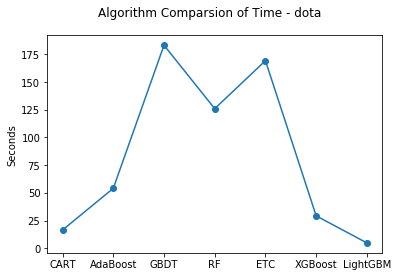

In [12]:
# 折线图比较算法执行时间
fig = pyplot.figure()
fig.suptitle('Algorithm Comparsion of Time - dota')
ax = fig.add_subplot(111)
x = range(len(models.keys()))
pyplot.plot(x, timeResults, 'o-')
pyplot.xticks(x, models.keys())
pyplot.ylabel('Seconds')
pyplot.savefig('./Algorithm Comparsion of Time - dota.png') # 保存图片
pyplot.show()

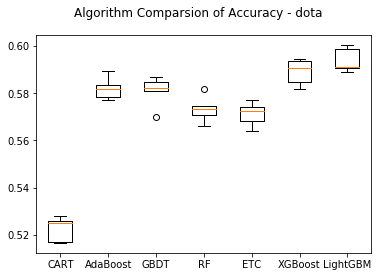

In [13]:
# 箱线图比较算法
fig = pyplot.figure()
fig.suptitle('Algorithm Comparsion of Accuracy - dota')
ax = fig.add_subplot(111)
pyplot.boxplot(results_fold)
ax.set_xticklabels(models.keys())
pyplot.savefig('./Algorithm Comparsion of Accuracy - dota.png') # 保存图片
pyplot.show()